## Raghav Virmani  101803657  COE1 - Assignment 6



In [ ]:
import pandas as pd
import copy as copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Question 1

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
# Since iris datasets have 3 different target values, we can have pairs like: [0,[1,2]], [1,[0,2]] and [2,[0,1]].
# For every combined class, let's name that category as 3
sc = StandardScaler()
classes = [0,1,2]
classifiers = []
def getDF():
    df_temp = copy.deepcopy(df)
    df_temp['target'] = df_temp['target'].replace({c:10})
    ind = classes.index(c)
    for x in classes[0:ind] + classes[ind+1:]:
        df_temp['target'] = df_temp['target'].replace({x:-10})
    return df_temp

def get_classifier(X_train, y_train):
    alpha = 0.001
    #print(y_train.shape)
    m, k = X_train.shape
    beta=np.zeros(k)
    for i in range(1000):
        cost_gradient = np.zeros(k)
        z = X_train.dot(beta)
        #print(z.shape)
        predicted = 1/(1+np.exp(-z))
        difference = predicted.values-y_train.values
        #print(difference)
        for j in range(k):
            cost_gradient[j] = np.sum(difference.dot(X_train.iloc[:,j]))
        for j in range(k):
            beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
    return beta

for c in classes:
    temp_df = getDF()
    #print(temp_df['target']])
    X = temp_df.iloc[:,:4]
    y = temp_df.iloc[:,4]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
    X_train = sc.fit_transform(X_train)
    X_train = pd.DataFrame(X_train)
    X_train.insert(0, 'col0', 1)
    classifiers.append(get_classifier(X_train, y_train))
print(classifiers)

[array([ 0.        , -5.92276144,  5.02744865, -7.89651962, -7.53355543]), array([ 0.        ,  0.0491823 , -4.54654179,  1.20270653,  0.43336203]), array([ 0.        ,  5.73462457, -0.29369309,  6.50348605,  6.92593823])]


In [ ]:
X_test = X_test.reset_index(drop = True)
X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.insert(0, 'col0', 1)
X_test

,col0,0,1,2,3
0,1,0.313246,-0.813354,0.655910,0.116976
1,1,-0.177052,1.391522,-0.977814,-1.011005
2,1,2.274436,-1.254329,1.853974,1.495619
3,1,0.190671,-0.592867,0.546995,0.492969
4,1,1.171267,-0.813354,0.710367,0.367638
5,1,-0.544775,0.509571,-1.086729,-0.885674
6,1,-0.299626,-0.592867,0.056878,0.242307
7,1,1.293841,-0.151891,0.873740,1.495619
8,1,0.435820,-2.136280,0.546995,0.492969
9,1,-0.054478,-1.033842,0.220250,0.116976


In [ ]:
y_pred = []
for i in range(len(X_test)):
    pred_class = 0
    max_sig = 0
    for j in range(len(classifiers)):
        z = X_test.iloc[i].dot(classifiers[j])
        sigmoid_value = 1 / (1 + np.exp(-z))
        
        print(j," ",sigmoid_value)
        
        if sigmoid_value > max_sig:
            max_sig = sigmoid_value
            pred_class = j
    print("\n")
    y_pred.append(pred_class)
print(y_pred)

0   6.113372515580762e-06
1   0.9895734161282591
2   0.9991846614946949


0   0.9999999999299793
1   0.00035272325882360626
2   3.791383535699515e-07


0   1.4439910383673827e-20
1   0.9998322142082043
2   0.9999999999999998


0   5.325088794362247e-06
1   0.9727845901282719
2   0.9997359739405842


0   3.735882807077771e-09
1   0.9915845808578029
2   0.9999992637932777


0   0.9999999992729791
1   0.01738833892956647
2   6.995686184956791e-08


0   0.029870424390281907
1   0.945533865219005
2   0.6233949532126796


0   2.8220204435577885e-12
1   0.9207960177531231
2   0.9999999999380826


0   5.319539853199409e-10
1   0.9999752244550707
2   0.9999588532652308


0   0.000555335296101456
1   0.9933950889049695
2   0.9032426808787232


0   2.6502969109210966e-09
1   0.7796624901999778
2   0.9999999851413388


0   0.9999999999699023
1   0.4282000807280635
2   6.932991339831358e-11


0   0.9999999999682461
1   0.005114937628449635
2   1.1491901790553943e-08


0   0.9999999999684377
1   0.2

### Question 2

In [ ]:
exam_df = pd.read_csv(".\\exam.txt", names = ['score1','score2','target'])
exam_df.head()

,score1,score2,target
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


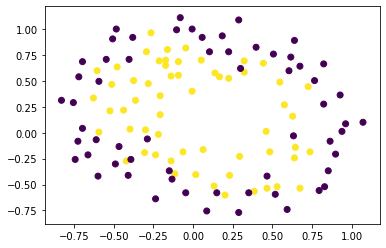

In [ ]:
plt.scatter(x = exam_df['score1'], y = exam_df['score2'], c = exam_df['target'])

In [ ]:
exam_df.describe()

,score1,score2,target
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [ ]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score1  118 non-null    float64
 1   score2  118 non-null    float64
 2   target  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


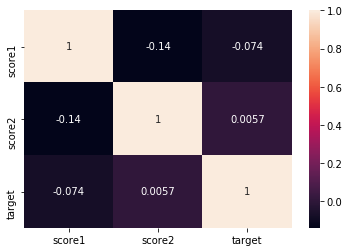

In [ ]:
sns.heatmap(exam_df.iloc[:,:].corr(),annot = True)

In [ ]:
# Fit a logistic regression upto degree 6

#(i) No regulariztion, alpha = 10, no_of_iterations = 1000

#(ii) regularization, alpha = 10, no_of_iterations = 1000

number_of_iterations = 1000

In [ ]:
X = exam_df.iloc[:,:2]
y = exam_df.iloc[:,2]
X.insert(0, 'col0', 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)

In [ ]:
alpha = 0.01
m, k = X_train.shape
beta=np.zeros(k)
for i in range(number_of_iterations):
    cost_gradient = np.zeros(k)
    z = X_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted-y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(X_train.iloc[:,j]))
    for j in range(k):
        beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

[-0.03590011 -0.12458216 -0.02340759]


In [ ]:
y_predict = 1/(1 + np.exp(-(X_test.dot(beta))))
y_predict = list(y_predict)
y_label = np.zeros(len(y_predict))
for i in range(len(y_predict)):
    if(y_predict[i] >= 0.5):
        y_label[i] = 1
print(y_label)

[1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]


In [ ]:
TP=0
TN=0
FP=0
FN=0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        TP = TP + 1
    if(y_test[i]==1 and y_label[i]==0):
        FN = FN + 1
    if(y_test[i]==0 and y_label[i]==1):
        FP = FP + 1
    if(y_test[i]==0 and y_label[i]==0):
        TN = TN + 1
print(TP,TN,FP,FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)

#For positive class:
precision_pos=TP/(TP + FP)
recall_pos=TP/(TP + FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)

#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print(precision_neg,recall_neg,f1_score_neg)

4 12 6 14
0.4 0.2222222222222222 0.2857142857142857
0.46153846153846156 0.6666666666666666 0.5454545454545455


In [ ]:
macro_precision = (precision_pos+precision_neg)/2
macro_recall = (recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print(macro_precision,macro_recall,macro_f1_score)

0.4307692307692308 0.4444444444444444 0.4155844155844156


In [ ]:
l1=len(y_test[y_test==0])
l2=len(y_test[y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print(weighted_precision,weighted_recall,weighted_f1_score)

0.4307692307692308 0.4444444444444444 0.4155844155844156


### (ii) part

In [ ]:
alpha = 0.01 #alpha = 10 classifies all classes as 1.0 and division by zero error encountered
lamba = 0.2
m, k = X_train.shape
beta=np.zeros(k)
for i in range(number_of_iterations):
    cost_gradient = np.zeros(k)
    z = X_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted-y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(X_train.iloc[:,j]))
    for j in range(k):
        beta[j] = (1-(alpha*lamba/m))*beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

[-0.03568502 -0.12324469 -0.0231785 ]


In [ ]:
y_predict = 1/(1 + np.exp(-(X_test.dot(beta))))
y_predict = list(y_predict)
y_label = np.zeros(len(y_predict))
for i in range(len(y_predict)):
    if(y_predict[i] >= 0.5):
        y_label[i] = 1
print(y_label)

[1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]


In [ ]:
TP=0
TN=0
FP=0
FN=0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        TP = TP + 1
    if(y_test[i]==1 and y_label[i]==0):
        FN = FN + 1
    if(y_test[i]==0 and y_label[i]==1):
        FP = FP + 1
    if(y_test[i]==0 and y_label[i]==0):
        TN = TN + 1
print(TP,TN,FP,FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)

#For positive class:
precision_pos=TP/(TP + FP)
recall_pos=TP/(TP + FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)

#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print(precision_neg,recall_neg,f1_score_neg)

4 12 6 14
0.4 0.2222222222222222 0.2857142857142857
0.46153846153846156 0.6666666666666666 0.5454545454545455


In [ ]:
macro_precision = (precision_pos+precision_neg)/2
macro_recall = (recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print(macro_precision,macro_recall,macro_f1_score)

0.4307692307692308 0.4444444444444444 0.4155844155844156


In [ ]:
    l1=len(y_test[y_test==0])
    l2=len(y_test[y_test==1])
    weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
    weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
    weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
    print(weighted_precision,weighted_recall,weighted_f1_score)

0.4307692307692308 0.4444444444444444 0.4155844155844156


In [ ]:
x = pd.Series([1,2,3,4,5])
y = pd.Series([12,3,4,5,6,7])
z = x-y
z.values

array([-11.,  -1.,  -1.,  -1.,  -1.,  nan])